In [0]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5.9, 8.1, 9.9])
print(x)
print(y)

[1 2 3 4 5]
[2.  4.  5.9 8.1 9.9]


In [0]:
a = []
b = []
c = []
d = []
e = []
for i in range(5):
    a.append(x[i] - np.mean(x))
    b.append(y[i] - np.mean(y))
    c.append((x[i] - np.mean(x))**2)
    d.append(a[i]*b[i])
    e.append((y[i] - np.mean(y))**2)

beta1 = np.sum(d) / np.sum(c)
beta0 = np.mean(y) - np.mean(x)*beta1

r = np.sum(d) / np.sqrt(np.sum(c) * np.sum(e))
                        
print(r)

0.9996592737384135


In [0]:
!ls
! if [ ! -e kirby21.csv ] ; \
  then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv; \
fi
  
df = pd.read_csv("/content/kirby21.csv")

kirby21.csv  sample_data


In [0]:
import pandas as pd
import numpy as np

In [0]:
df = df.drop(['Unnamed: 0', 'rawid', 'min', 'max'],\
             axis = 1)
df.head(5)

,roi,volume,mean,std,type,level,id,icv,tbv
0,Telencephalon_L,531111,128.3013,51.8593,1,1,127,1378295,1268519
1,Telencephalon_R,543404,135.0683,53.6471,1,1,127,1378295,1268519
2,Diencephalon_L,9683,193.5488,32.2733,1,1,127,1378295,1268519
3,Diencephalon_R,9678,193.7051,32.7869,1,1,127,1378295,1268519
4,Mesencephalon,10268,230.8583,29.2249,1,1,127,1378295,1268519


In [0]:
## Extract the Type 1 Level 1 data
t1l1 = df.loc[(df.type == 1) & (df.level == 1)]

In [0]:
xlist = df[df['roi'] == 'Diencephalon_L']['volume']
ylist = df[df['roi'] == 'Diencephalon_R']['volume']

Text(0, 0.5, 'Diencephalon_R volume')

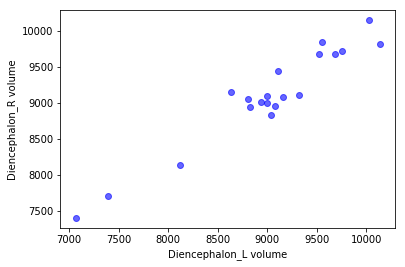

In [0]:
import matplotlib.pyplot as plt

plt.scatter(xlist, ylist, c='b', alpha = 0.6)
plt.xlabel('Diencephalon_L volume')
plt.ylabel('Diencephalon_R volume')

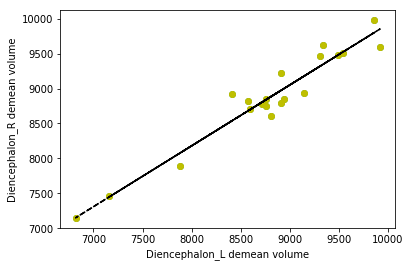

slope:  0.8709409773903897


In [0]:
x_mean = df[df['roi'] == 'Diencephalon_L']['mean']
y_mean = df[df['roi'] == 'Diencephalon_R']['mean']

x_new = xlist - x_mean
y_new = ylist - y_mean

plt.scatter(x_new, y_new, c='g', alpha = 0.6)
plt.xlabel('Diencephalon_L demean volume')
plt.ylabel('Diencephalon_R demean volume')

from pylab import * 

m,b = polyfit(x_new, y_new, 1) 

plot(x_new, y_new, 'yo', x_new, m*x_new+b, '--k') 
plt.show() 
print('slope: ', m)


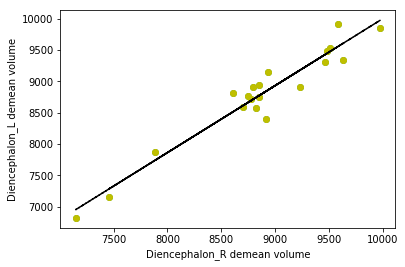

slope:  1.0678629204276875


In [0]:
y_new = xlist - x_mean
x_new = ylist - y_mean

plt.scatter(x_new, y_new, c='g', alpha = 0.6)
plt.xlabel('Diencephalon_R demean volume')
plt.ylabel('Diencephalon_L demean volume')

m,b = polyfit(x_new, y_new, 1) 

plot(x_new, y_new, 'yo', x_new, m*x_new+b, '--k') 
plt.show() 
print('slope: ', m)